In [1]:
%%html
<style type='text/css'>
.CodeMirror{
font-family: 'Consolas';
font-size: 12px;
</style>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model


In [3]:
import tensorflow as tf
cifar10 = tf.keras.datasets.cifar10

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print(x_train.shape, y_train.shape)
y_train, y_test = y_train.flatten(), y_test.flatten()
print(y_train.shape)

(50000, 32, 32, 3) (50000, 1)
(50000,)


In [5]:
K = len(set(y_train.flatten()))
print(K)


10


In [9]:
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3,3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

# x = GlobalMaxPooling()(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)


In [10]:
model = Model(i,x)

In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 11s 7ms/step - loss: 1.2811 - accuracy: 0.5615 - val_loss: 1.0628 - val_accuracy: 0.6336
Epoch 2/15
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8278 - accuracy: 0.7142 - val_loss: 0.7646 - val_accuracy: 0.7413
Epoch 3/15
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6739 - accuracy: 0.7669 - val_loss: 0.7695 - val_accuracy: 0.7449
Epoch 4/15
1563/1563 [==============================] - 10s 6ms/step - loss: 0.5720 - accuracy: 0.8054 - val_loss: 0.6185 - val_accuracy: 0.7940
Epoch 5/15
1563/1563 [==============================] - 10s 6ms/step - loss: 0.4858 - accuracy: 0.8319 - val_loss: 0.6077 - val_accuracy: 0.8051
Epoch 6/15
1563/1563 [==============================] - 10s 7ms/step - loss: 0.4135 - accuracy: 0.8573 - val_loss: 0.5856 - val_accuracy: 0.8106
Epoch 7/15
1563/1563 [==============================] - 10s 6ms/step - loss: 0.3545 - accuracy: 0.8777 - val_loss: 0.6079 - val_ac

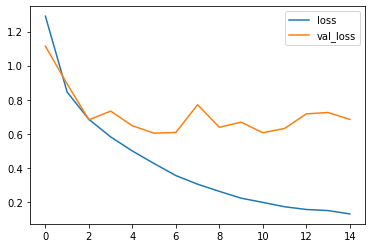

In [11]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

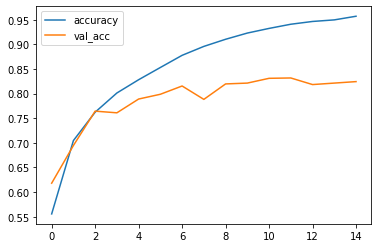

In [12]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [6]:
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3,3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

# x = GlobalMaxPooling()(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)


In [7]:
model = Model(i,x)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_6 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        1849

In [14]:
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
r = model.fit(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=15)

Epoch 1/50
1562/1562 [==============================] - 16s 10ms/step - loss: 0.6002 - accuracy: 0.8039 - val_loss: 0.5634 - val_accuracy: 0.8130
Epoch 2/50
1562/1562 [==============================] - 15s 9ms/step - loss: 0.4999 - accuracy: 0.8331 - val_loss: 0.5278 - val_accuracy: 0.8293
Epoch 3/50
1562/1562 [==============================] - 14s 9ms/step - loss: 0.4648 - accuracy: 0.8429 - val_loss: 0.4735 - val_accuracy: 0.8428
Epoch 4/50
1562/1562 [==============================] - 15s 10ms/step - loss: 0.4276 - accuracy: 0.8552 - val_loss: 0.5180 - val_accuracy: 0.8294
Epoch 5/50
1562/1562 [==============================] - 15s 9ms/step - loss: 0.4131 - accuracy: 0.8592 - val_loss: 0.4228 - val_accuracy: 0.8553
Epoch 6/50
1562/1562 [==============================] - 15s 9ms/step - loss: 0.3949 - accuracy: 0.8658 - val_loss: 0.4998 - val_accuracy: 0.8340
Epoch 7/50
1562/1562 [==============================] - 15s 9ms/step - loss: 0.3760 - accuracy: 0.8719 - val_loss: 0.4858 - val_

KeyboardInterrupt: 